# Импорт зависимостей

In [51]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, recall_score, confusion_matrix
from sklearn.model_selection import StratifiedKFold, train_test_split, cross_val_score, GridSearchCV
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE, ADASYN

%config InlineBackend.figure_format = 'retina' # для более четкой отрисовки графиков

# Загрузка данных, анализ, препроцессинг

In [5]:
ds = pd.read_csv('creditcard.csv')
print('Размер датасета: {}'.format(ds.shape))

Размер датасета: (284807, 31)


In [6]:
ds.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
ds = ds.rename(columns={'Class':'target'}) # переименуем целевую переменную

In [7]:
ds['target'].value_counts() # очень несбаллансированный датасет

0    284315
1       492
Name: target, dtype: int64

In [8]:
ds.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
target      int64
dtype: object

In [9]:
ds.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
target    0
dtype: int64

In [10]:
x_train, x_test, y_train, y_test = train_test_split(ds.drop(['target'], axis=1), 
                                                    ds['target'],
                                                    test_size=0.2,
                                                    random_state=17,
                                                    shuffle=True
                                                   )

In [11]:
print(x_train.shape, x_test.shape)

(227845, 30) (56962, 30)


In [17]:
x_train

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
201743,134018.0,-0.511326,0.236331,1.623005,-0.551395,0.607391,-0.120819,0.589968,-0.163450,0.003828,...,0.300762,-0.209706,-0.550556,0.102705,0.676512,-0.479315,0.263062,-0.101774,-0.071974,43.90
78287,57461.0,-0.860359,1.499190,0.575222,1.070761,-0.497898,-1.065072,0.229828,0.320389,-0.736921,...,-0.193153,0.219184,0.571068,0.020289,0.748144,-0.166166,-0.400871,-0.565567,-0.355837,1.50
169429,119698.0,-0.837426,1.680458,-1.158339,-0.609297,0.329795,-0.608996,0.186290,0.875520,-0.570284,...,-0.029223,-0.215198,-0.664154,0.205709,0.616889,-0.360965,0.099370,0.090837,0.000518,8.98
151757,96198.0,-0.781264,0.558682,-0.074012,-1.214515,2.096514,-1.456830,1.290064,-0.390933,0.339529,...,-0.059478,0.157582,0.540498,-0.417742,-0.392008,0.553177,0.105546,-0.021627,0.098473,5.44
248819,154108.0,0.831424,0.077168,-2.458544,-1.980816,0.475857,-1.112980,-0.234947,-3.153761,-1.600923,...,0.482026,-0.588920,2.229704,-0.118759,-0.269055,-0.128075,-0.054539,0.210157,0.409425,48.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177671,123286.0,2.030429,-1.864871,-1.040505,-1.478854,-1.365162,-0.361434,-1.088430,-0.125531,-1.034809,...,-0.168838,-0.090118,-0.093320,0.167363,0.574301,-0.300059,-0.213858,-0.009931,-0.018579,152.00
79788,58182.0,-1.330770,0.484583,1.033039,-0.116151,0.702949,1.709175,-0.352348,1.278445,-0.264735,...,-0.119176,0.020414,0.122556,-0.002666,-1.360386,-0.340525,0.374900,0.256462,0.029821,10.82
251821,155513.0,-1.810404,-2.355201,0.008227,-3.682208,2.061562,3.446947,-0.741852,1.092634,-2.155141,...,0.675489,0.035336,-0.275063,0.446913,0.642152,0.842634,-0.105177,0.174193,0.145158,248.00
125680,77756.0,1.295611,0.261147,0.311426,0.500812,-0.208097,-0.700034,0.073902,-0.192643,0.028751,...,-0.055793,-0.286365,-0.808874,0.070904,-0.110810,0.295204,0.124374,-0.027532,0.014682,1.79


In [12]:
y_train.value_counts()

0    227443
1       402
Name: target, dtype: int64

In [13]:
y_test.value_counts()

0    56872
1       90
Name: target, dtype: int64

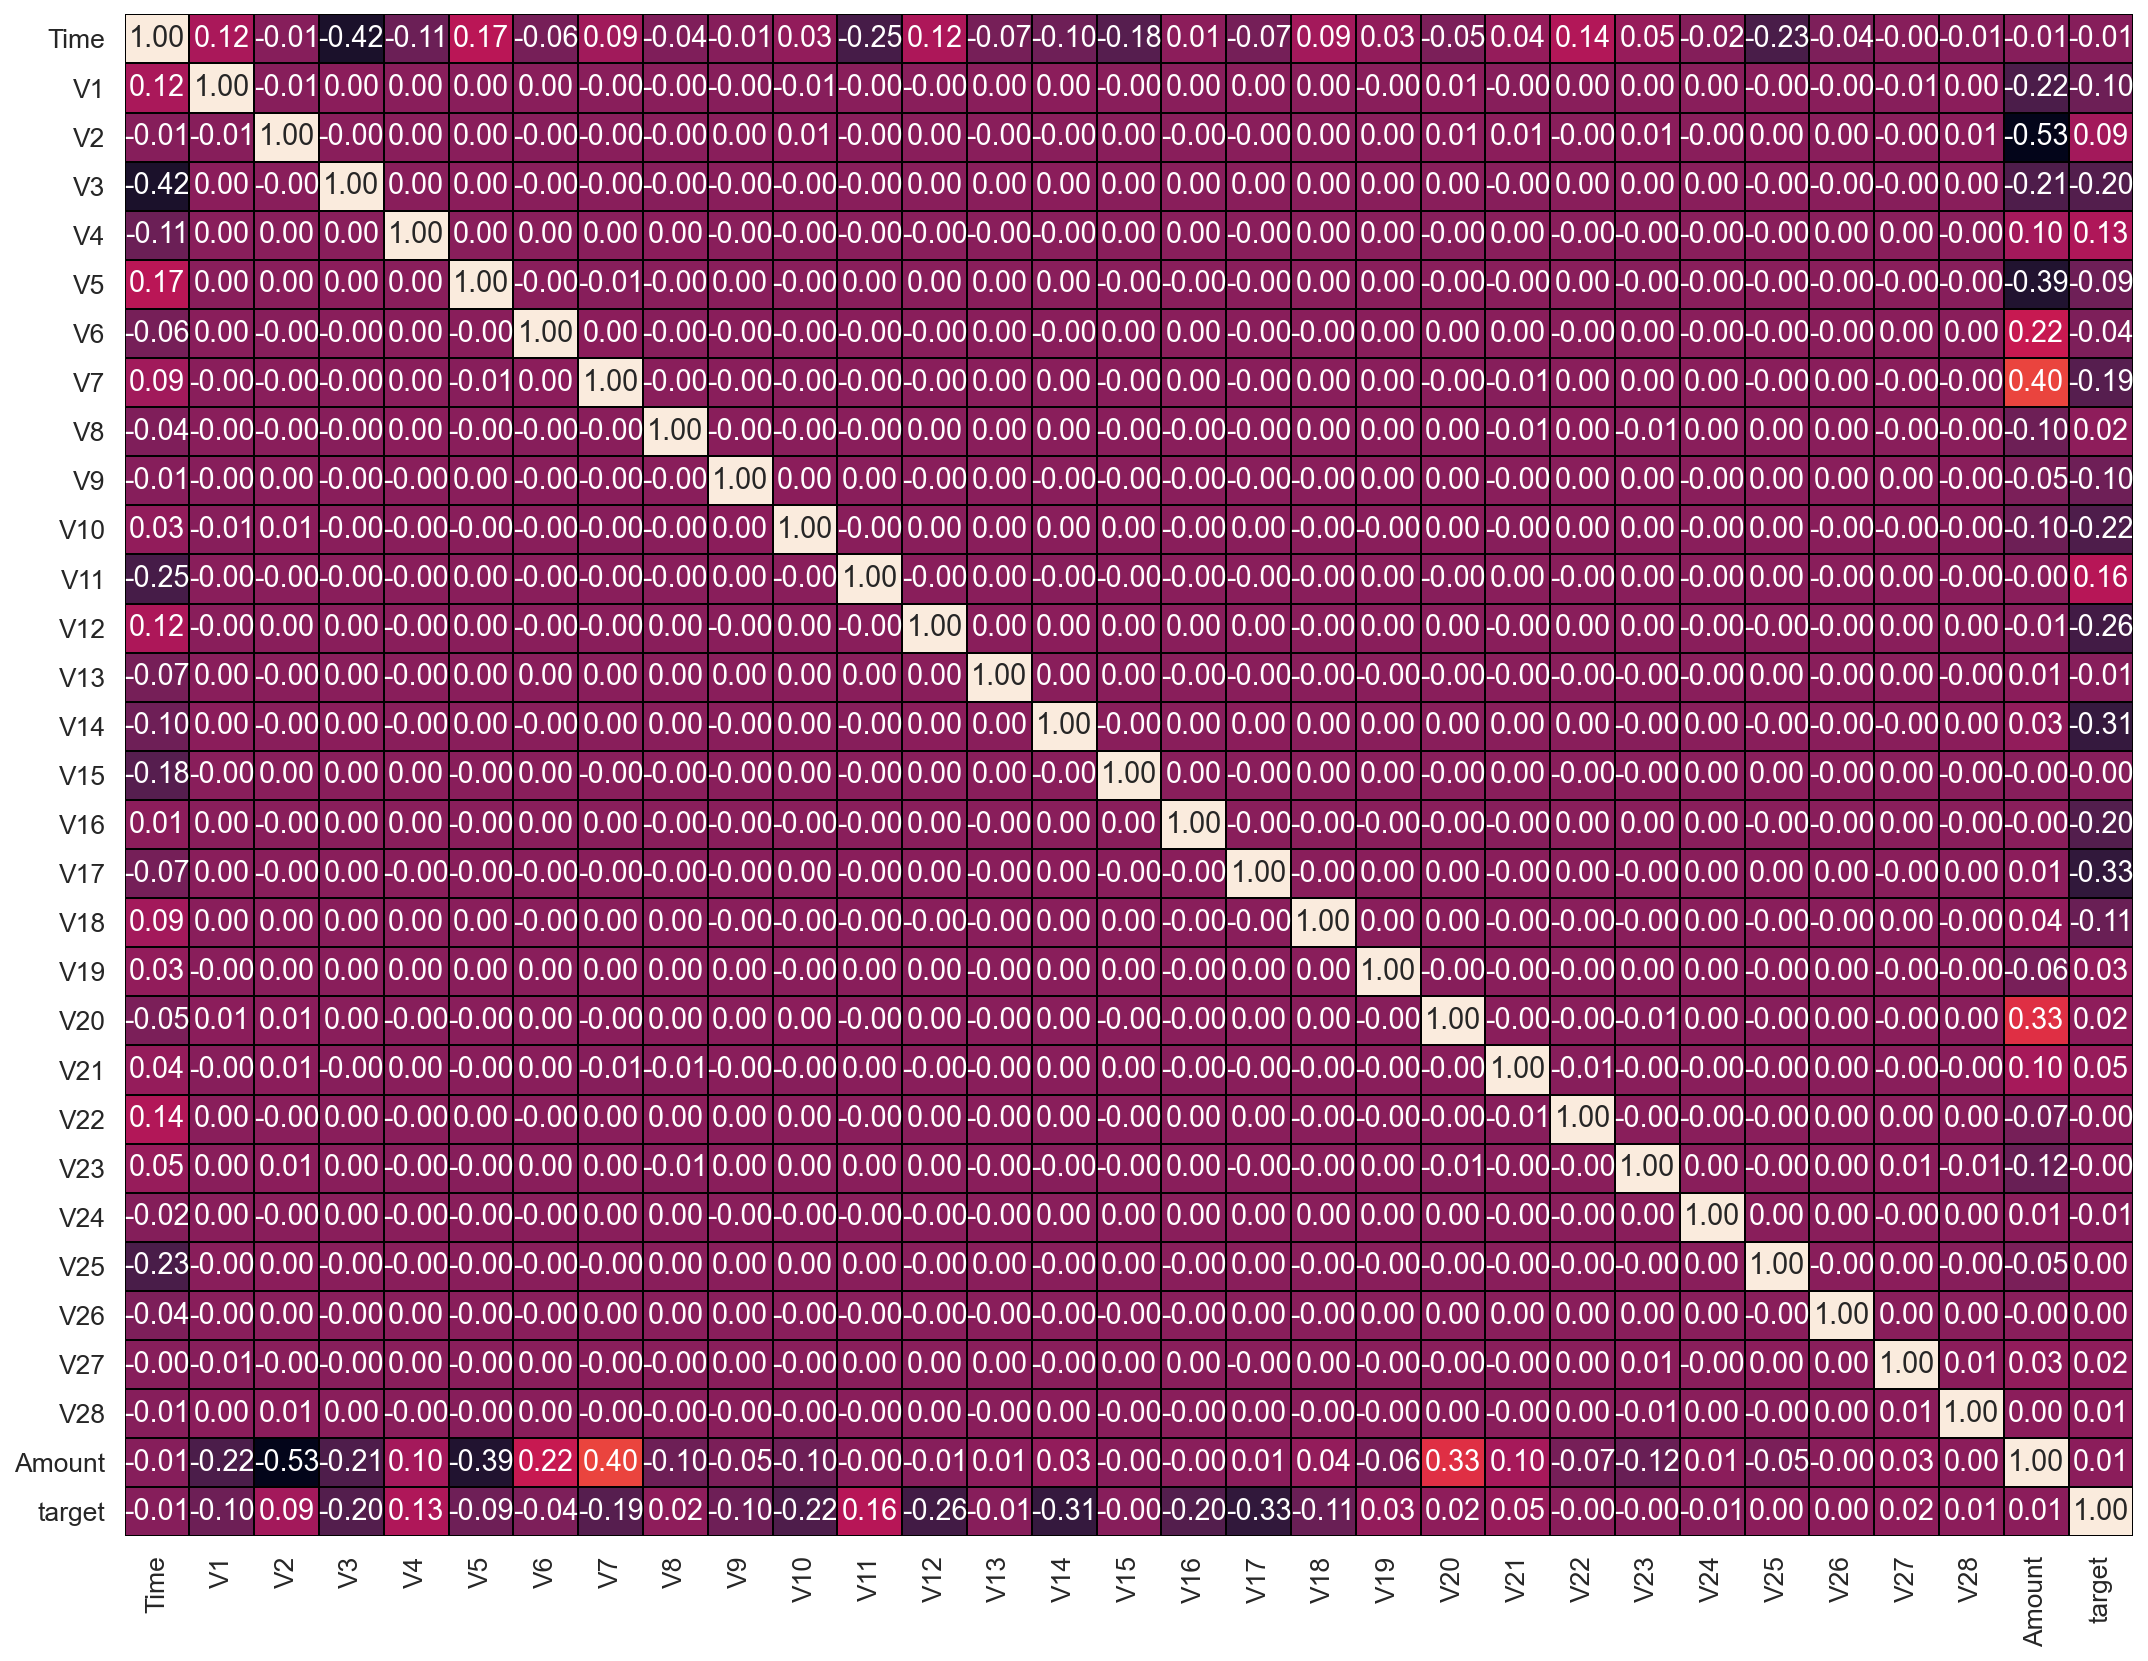

In [52]:
plt.figure(figsize=(18,14))
sns.heatmap(pd.concat([x_train, y_train], axis=1).corr(), 
            annot=True, 
            fmt='.2f', 
            cbar=False,
            linecolor='black',
            linewidth=0.1
           );

# Построение модели

In [34]:
forest = RandomForestClassifier(n_estimators=100, n_jobs=-1) # пока оставим дефолтные параметры
skf = StratifiedKFold(n_splits=5) # схема для кросс-валидации

cv_score = cross_val_score(forest, 
                           x_train, 
                           y_train, 
                           scoring='roc_auc', 
                           cv=skf, 
                           n_jobs=-1,
                          ) # прогоняем модель на кросс-валидации
print('ROC AUC модели на кросс-валидации: %.3f+-%.3f'% (np.mean(cv_score), np.std(cv_score)))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


ROC AUC модели на кросс-валидации: 0.949+-0.026


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  2.8min finished


In [63]:
forest.fit(x_train, y_train) # тренируем моедль на всей тренировочной выборке

print('ROC AUC модели на тестовой выборке: %.3f' % roc_auc_score(y_test, forest.predict(x_test)))
print('Recall модели на тестовой выборке: %.3f' % recall_score(y_test, forest.predict(x_test)))

ROC AUC модели на тестовой выборке: 0.878
Recall модели на тестовой выборке: 0.756


In [64]:
pd.DataFrame(forest.feature_importances_, 
             index=x_train.columns,
             columns=['Feature importance']).sort_values(by='Feature importance', ascending=False)

,Feature importance
V17,0.161465
V14,0.158826
V12,0.141217
V10,0.077919
V11,0.047145
V16,0.044777
V9,0.034770
V7,0.033133
V4,0.029346
V18,0.026468


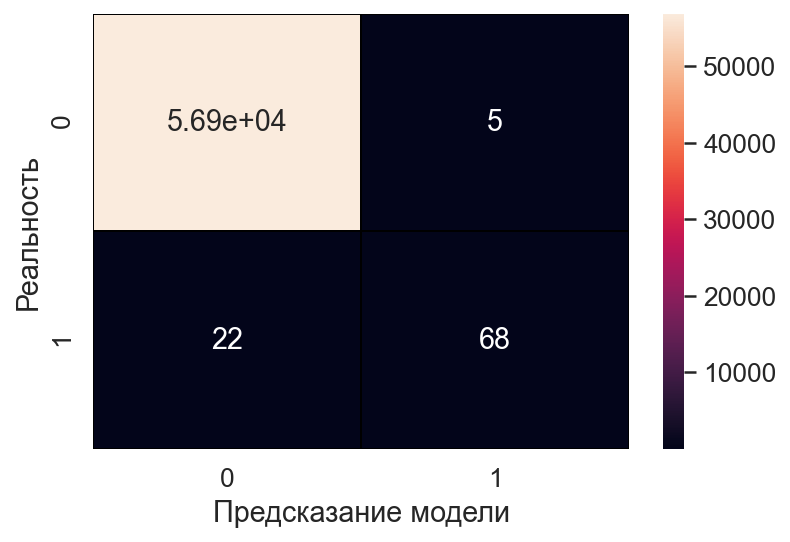

In [65]:
sns.set(font_scale=1.2)
sns.heatmap(confusion_matrix(y_test, forest.predict(x_test)), 
            annot=True, 
            fmt = '.3g',
            linewidths=0.1,
            linecolor='black'
           );
plt.xlabel('Предсказание модели')
plt.ylabel('Реальность');

In [66]:
smote = SMOTE(sampling_strategy=0.1)
x_over, y_over = smote.fit_resample(x_train, y_train) # сгенирируем больше образцов целевого класса

forest.fit(x_over, y_over) # тренируем моедль на всей тренировочной выборке

print('ROC AUC модели на тестовой выборке: %.3f' % roc_auc_score(y_test, forest.predict(x_test)))
print('Recall модели на тестовой выборке: %.3f' % recall_score(y_test, forest.predict(x_test)))

ROC AUC модели на тестовой выборке: 0.922
Recall модели на тестовой выборке: 0.844


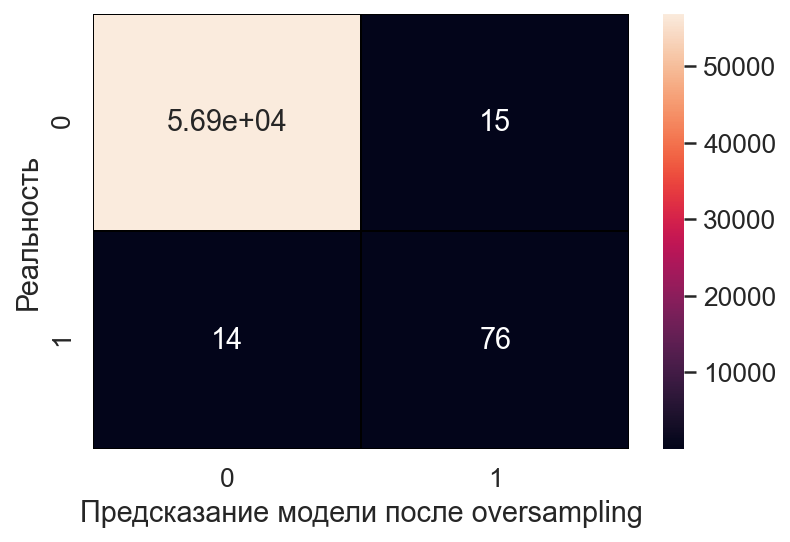

In [67]:
sns.set(font_scale=1.2)
sns.heatmap(confusion_matrix(y_test, forest.predict(x_test)), 
            annot=True, 
            fmt = '.3g',
            linewidths=0.1,
            linecolor='black'
           );
plt.xlabel('Предсказание модели после oversampling')
plt.ylabel('Реальность');

Oversampling помог улучшить модель. Для дальнейшего улучшения можно предварительно настроить модель на кросс-валидации, но настройка займет значительное время.

In [ ]:
# настройка модели на кросс-валидации
# params = {'n_estimators': (100, 200, 500), 
#           'max_depth': (7, 15, 21), 
#           'min_samples_split': (2, 4)}
# forest_grid = GridSearchCV(tree, param_grid=params, scoring='roc_auc', n_jobs=-1, cv=skf)
# forest_grid.fit(x_train, y_train)

# print('Лучшая модель на кросс-валидации с параметрами {} и результатом {}'.format(forest_grid.best_params_, 
#                                                                         forest_grid.best_score_,))
# best_model = forest_grid.best_estimator_